In [3]:
import pandas as pd
from pandas_datareader import data as wb
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
tickers = ["AAPL", "IBM", "CSCO", "AMZN"]
portFolio = pd.DataFrame()
for t in tickers:
    portFolio[t] = wb.DataReader(t, data_source="yahoo", start = "2012-1-1")["Adj Close"]

In [5]:
portFolio.head()

,AAPL,IBM,CSCO,AMZN
Date,,,,
2012-01-03,50.994907,139.934006,14.633397,179.029999
2012-01-04,51.268970,139.363144,14.916168,177.509995
2012-01-05,51.838169,138.702209,14.861184,177.610001
2012-01-06,52.380054,137.109772,14.806202,182.610001
2012-01-09,52.296970,136.396225,14.900459,178.559998


In [6]:
mean_Daily_return = portFolio.pct_change(1).mean()

In [7]:
mean_Daily_return

AAPL    0.001029
IBM     0.000113
CSCO    0.000668
AMZN    0.001389
dtype: float64

In [8]:
port_Corr = portFolio.pct_change(1).corr()

In [9]:
port_Corr

,AAPL,IBM,CSCO,AMZN
AAPL,1.000000,0.323761,0.388666,0.351337
IBM,0.323761,1.000000,0.442769,0.301619
CSCO,0.388666,0.442769,1.000000,0.360875
AMZN,0.351337,0.301619,0.360875,1.000000


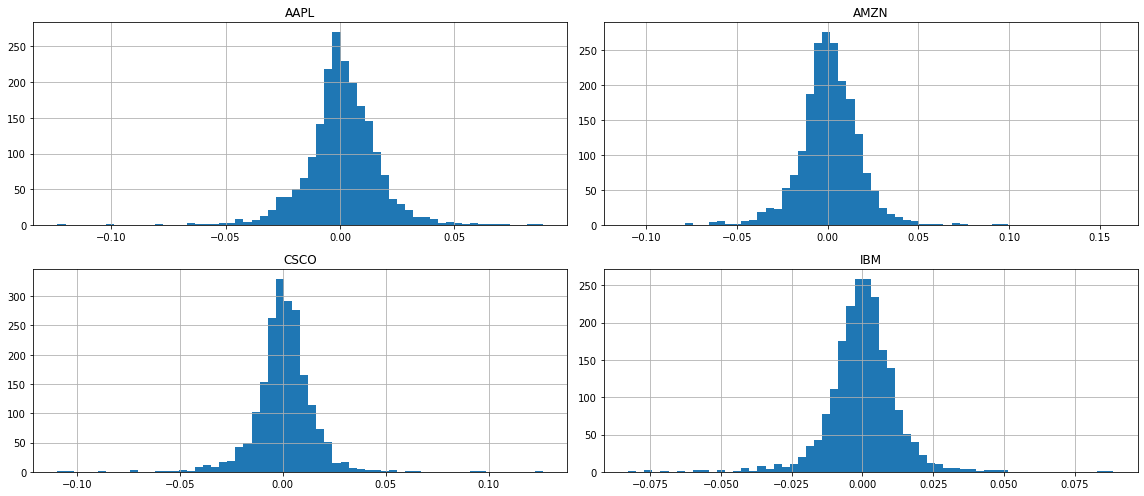

In [12]:
portFolio.pct_change(1).hist(bins = 60, figsize = (16,7))
plt.tight_layout()

In [16]:
port_Covariance = portFolio.pct_change(1).cov() * 252

In [17]:
port_Covariance

,AAPL,IBM,CSCO,AMZN
AAPL,0.065397,0.016180,0.022577,0.026625
IBM,0.016180,0.038190,0.019655,0.017467
CSCO,0.022577,0.019655,0.051598,0.024292
AMZN,0.026625,0.017467,0.024292,0.087816


#### LEts generate random allocations for the portfolio

In [18]:
print(portFolio.columns)

Index(['AAPL', 'IBM', 'CSCO', 'AMZN'], dtype='object')


In [37]:
np.random.seed(101)

number_of_port = 2000
all_Weights = np.zeros((number_of_port, len(portFolio.columns)))
ret_array = np.zeros(number_of_port)
vol_array = np.zeros(number_of_port)
sharp_array = np.zeros(number_of_port)

for index in range(number_of_port):
    
    random_weights = np.random.random(4)
    random_weights = random_weights/np.sum(random_weights)
    
    all_Weights[index,:] =random_weights
    ## Expected Returns
    ret_array[index] = np.sum((portFolio.pct_change(1).mean() * random_weights) * 252)

    vol_array[index] = np.sqrt(np.dot(random_weights.T, np.dot(port_Covariance, random_weights)))

    sharp_array[index] = ret_array[index]/ vol_array[index]

In [38]:
sharp_array.max()

1.3488922160032664

In [39]:
sharp_array.argmax()

1087

In [40]:
all_Weights[139]

array([0.02135807, 0.01935326, 0.11272843, 0.84656025])

TypeError: 'str' object is not callable

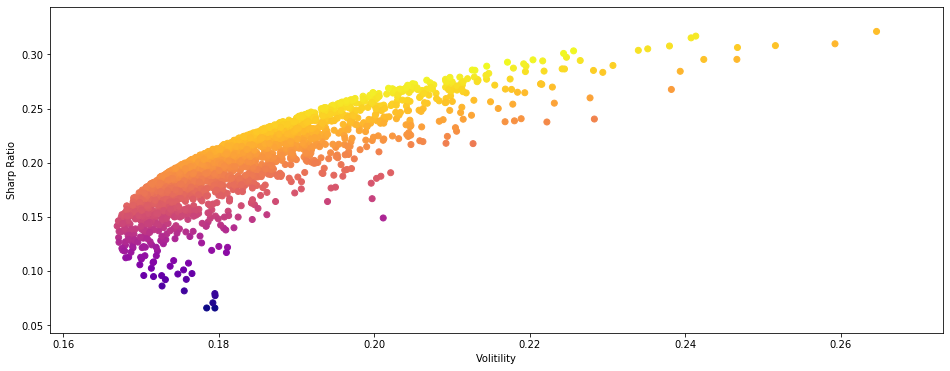

In [54]:
plt.figure(figsize=(16,6))
plt.scatter(vol_array,ret_array, c = sharp_array, cmap="plasma")
plt.xlabel("Volitility")
plt.ylabel("Sharp Ratio")
plt.colorbar()

## The Random weights above does not add up to 100% so we need to fix this. Lets rebalance the weights